#**Ingredient Analysis using Natural Language Processing and Custom Named Entity Recognition and Machine Learning Techniques**

# ***Importing Library and Mounting the Drive***

---



In [ ]:
import spacy
from spacy.tokens import DocBin
from tqdm import tqdm
!apt-get update
!apt-get install -y tesseract-ocr
!pip install pytesseract

import pytesseract
from PIL import Image
import cv2
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
nlp = spacy.load('en_core_web_sm')



Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [57.5 kB]
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:14 https://r2u.stat.illin

In [ ]:
from google.colab import drive
drive.mount('/content/drive')   #Note for the supervisor and marker: Make sure your Google Drive is connected to the Google Colab, all the files need to be saved in your Google Drive First

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Text Preprocessing Function**
The following function helps clean the text that we will be using. I had used this function in one of my previous works, with some tweaks for the current use case

In [ ]:
def preprocess_text(text):
    text = text.lower() # Convert to lowercase
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text = re.sub('#\S+', '', text)  # remove hashtags
    text = re.sub(r'\d+', '', text) # Remove numbers
    text = re.sub('@\S+', '  ', text)  # remove mentions
    text = re.sub(r'\b\d+\b', '', text)  # remove independent numbers
    #text = re.sub('[%s]' % re.escape("""!"#$%&'()*+-./:;<=>?@[\]^_`{|}~"""),',', text) # remove punctuations
    #text = re.sub('[%s]' % re.escape("""!"#$%&'()*+-./;:"""), ',', text)
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+-./:;<=>?,@[\]^_`{|}~"""), ', ', text) # remove punctuations
    text = re.sub(r'[^\x00-\x7f]', ' ', text) # remove extra whitespace
    text = re.sub('\s+', ' ', text)  # remove extra whitespace
    #text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation

    return text

# ***Ingredients' Extraction Using PyTesseract***
The images of ingredients sourced from superstores like Tesco and Aldi will be extracted in this section for 3 categories.


In [ ]:
# Category 1: Chips, Nuts and Popcorn
import os
img_cat_1=os.chdir('/content/drive/MyDrive/data_collection/Category_1_Chips,nuts, popcorns') #Note for the supervisor and marker: Paste the path of Google Drive where images of category 1 are stored
img_train=[i for i in os.listdir(img_cat_1) if i.endswith(('.png','jpg','jpeg'))]
print(img_train)

['cashew1.png', 'cashew2.png', 'cashew3.png', 'cashew4.png', 'cashew5.png', 'cashew6.png', 'Screenshot 2024-07-30 120754.png', 'Screenshot 2024-07-30 120849.png', 'Screenshot 2024-07-30 120937.png', 'Screenshot 2024-07-30 121029.png', 'Screenshot 2024-07-30 121111.png', 'Screenshot 2024-07-30 121154.png', 'Screenshot 2024-07-30 121318.png', 'Screenshot 2024-07-30 121351.png', 'Screenshot 2024-07-30 121438.png', 'Screenshot 2024-07-30 121545.png', 'Screenshot 2024-07-30 121621.png', 'Screenshot 2024-07-30 121709.png', 'Screenshot 2024-07-30 121748.png', 'Screenshot 2024-07-30 121826.png', 'Screenshot 2024-07-30 121909.png', 'Screenshot 2024-07-30 122109.png', 'Screenshot 2024-07-30 122204.png', 'Screenshot 2024-07-30 122244.png', 'Screenshot 2024-07-30 122329.png', 'Screenshot 2024-07-30 122729.png', 'Screenshot 2024-07-30 122824.png', 'Screenshot 2024-07-30 122908.png', 'Screenshot 2024-07-30 122938.png', 'Screenshot 2024-07-30 123009.png', 'Screenshot 2024-07-30 123053.png', 'Screensh

In [ ]:
#Ingredient list extraction using Pytesseract for Category 1.
tr_1=[]
for img in range(len(img_train)):
    #path_to_image=os.path.join(img_directory,img)
    image=Image.open(img_train[img])
    text_results=preprocess_text((pytesseract.image_to_string(image)))
    tr_1.append(text_results)

In [ ]:
#Category 2: Biscuits and Crackers
import os
img_cat_2=os.chdir('/content/drive/MyDrive/data_collection/Cat_2_biscuits') #Note for the supervisor and marker: Paste the path of Google Drive where images of category 2 are stored
img_train_2=[i for i in os.listdir(img_cat_2) if i.endswith(('.png','jpg','jpeg'))]
print(img_train_2)

['Screenshot 2024-07-31 095732.png', 'Screenshot 2024-07-31 095759.png', 'Screenshot 2024-07-31 095817.png', 'Screenshot 2024-07-31 095837.png', 'Screenshot 2024-07-31 095951.png', 'Screenshot 2024-07-31 100010.png', 'Screenshot 2024-07-31 100035.png', 'Screenshot 2024-07-31 100054.png', 'Screenshot 2024-07-31 100117.png', 'Screenshot 2024-07-31 100133.png', 'Screenshot 2024-07-31 100151.png', 'Screenshot 2024-07-31 100214.png', 'Screenshot 2024-07-31 100232.png', 'Screenshot 2024-07-31 100252.png', 'Screenshot 2024-07-31 100311.png', 'Screenshot 2024-07-31 100357.png', 'Screenshot 2024-07-31 100430.png', 'Screenshot 2024-07-31 100452.png', 'Screenshot 2024-07-31 100510.png', 'Screenshot 2024-07-31 100531.png', 'Screenshot 2024-07-31 100558.png', 'Screenshot 2024-07-31 100621.png', 'Screenshot 2024-07-31 100643.png', 'Screenshot 2024-07-31 100700.png', 'Screenshot 2024-07-31 100733.png', 'Screenshot 2024-07-31 100753.png', 'Screenshot 2024-07-31 100822.png', 'Screenshot 2024-07-31 1008

In [ ]:
#Ingredient list extraction using Pytesseract for Category 2.
tr_2=[]
for img in range(len(img_train_2)):
    #path_to_image=os.path.join(img_directory,img)
    image=Image.open(img_train_2[img])
    text_results=preprocess_text((pytesseract.image_to_string(image)))
    tr_2.append(text_results)

In [ ]:
#Category 3: Sauces and Salads
import os
img_cat_3=os.chdir('/content/drive/MyDrive/data_collection/Cat_3_Sauces') #Note for the supervisor and marker: Paste the path of Google Drive where images of category 3 are stored
img_train_3=[i for i in os.listdir(img_cat_3) if i.endswith(('.png','jpg','jpeg'))]
print(img_train_3)

['Screenshot 2024-07-31 135159.png', 'Screenshot 2024-07-31 135235.png', 'Screenshot 2024-07-31 135813.png', 'Screenshot 2024-07-31 135938.png', 'Screenshot 2024-07-31 140013.png', 'Screenshot 2024-07-31 140047.png', 'Screenshot 2024-07-31 140215.png', 'Screenshot 2024-07-31 140306.png', 'Screenshot 2024-07-31 140403.png', 'Screenshot 2024-07-31 140450.png', 'Screenshot 2024-07-31 140611.png', 'Screenshot 2024-07-31 140640.png', 'Screenshot 2024-07-31 140707.png', 'Screenshot 2024-07-31 140732.png', 'Screenshot 2024-07-31 140801.png', 'Screenshot 2024-07-31 140847.png', 'Screenshot 2024-07-31 140917.png', 'Screenshot 2024-07-31 141042.png', 'Screenshot 2024-07-31 141131.png', 'Screenshot 2024-07-31 141202.png', 'Screenshot 2024-07-31 141246.png', 'Screenshot 2024-07-31 141431.png', 'Screenshot 2024-07-31 141509.png', 'Screenshot 2024-07-31 141551.png', 'Screenshot 2024-07-31 141633.png', 'Screenshot 2024-07-31 142238.png', 'Screenshot 2024-07-31 142329.png', 'Screenshot 2024-07-31 1424

In [ ]:
#Ingredient list extraction using Pytesseract for Category 3.

tr_3=[]
for img in range(len(img_train_3)):
    #path_to_image=os.path.join(img_directory,img)
    image=Image.open(img_train_3[img])
    text_results=preprocess_text((pytesseract.image_to_string(image)))
    tr_3.append(text_results)

In [ ]:
#Basic text cleaning using RegEx (Regular Expression)
import re
pattern=re.compile(r'(,\s){2,}')
extracted_train_1=[]
for i in range(len(tr_1)):
  ans=re.sub(pattern, ', ', tr_1[i])
  extracted_train_1.append(ans)
extracted_train_2=[]
for i in range(len(tr_2)):
  ans=re.sub(pattern, ', ', tr_2[i])
  extracted_train_2.append(ans)
extracted_train_3=[]
for i in range(len(tr_3)):
  ans=re.sub(pattern, ', ', tr_3[i])
  extracted_train_3.append(ans)

# **Training the CNER (Custom Named Entity Recognition)**

## CNER Training for Category 1

In [ ]:
#Annotations for Category 1.
train=("palm oil, vegetable oil, rapeseed oil, xanthan gum, guar gum, sodium diacetate, maltodextrin, monosodium glutamate,malic acid,citric acid, acidity regulator, disodium ribonucleotide, potassium chloride, wheat flour, niacin, thiamin, gluocose syrup, emulsifier, sunflower oil, gram flour, maize, wholewheat flour, garlic powder, turmeric powder, paprika powder, mango, rice flour, seasoning",{"entities":[(380,389,"safe additive"),(328,344,"safe additive"),(346,363,"safe additive"),(364,377,"safe additive"),(261,274,"Safe oil"),(276,286,"safe additive"),(288,293,"safe additive"),(295,311,"safe additive"),(313,326,"safe additive"),(249,259,"harmful additive"),(233,247,"sugar alternative"),(216,222,"safe additive"),(224,231,"safe additive"),(183,201,"harmful additive"),(158,181,"harmful additive"),(139,156,"harmful additive"),(126,137,"harmful additive"),(115,125,"harmful additive"),(93,114,"most harmful additive"),(80,92,"sugar alternative"),(62,78,"Harmful Flavour Enhancer"),(38,50,"harmful additive"),(52,60,"harmful additive"),(0,8,"Harmful oil"),(10,23,"Harmful oil"),(24,37,"Harmful oil")]}),

In [ ]:
# The Following code uses DocBin to use the above train data to fit the ingredients to the custom entities
db = DocBin() # create a DocBin object
for text, annot in tqdm(train): # data in previous format
    doc = nlp.make_doc(text) # create doc object from text
    ents = []
    for start, end, label in annot["entities"]: # add character indexes
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)
    doc.ents = ents # label the text with the ents
    db.add(doc)
db.to_disk("./train.spacy") # save the docbin object

# Credits for the above code: analyticsvidhya.com

100%|██████████| 1/1 [00:00<00:00, 22.99it/s]


In [ ]:
!python -m spacy init fill-config /content/drive/MyDrive/Dissertation_NLP/base_config.cfg config.cfg

✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [ ]:
!python -m spacy train config.cfg --output ./output --paths.train ./train.spacy --paths.dev ./train.spacy

ℹ Saving to output directory: output
ℹ Using CPU

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00     48.97    0.00    0.00    0.00    0.00
200     200        187.84   2308.78  100.00  100.00  100.00    1.00
400     400          0.00      0.00  100.00  100.00  100.00    1.00
600     600          0.00      0.00  100.00  100.00  100.00    1.00
800     800          0.00      0.00  100.00  100.00  100.00    1.00
1000    1000          0.00      0.00  100.00  100.00  100.00    1.00
1200    1200          0.00      0.00  100.00  100.00  100.00    1.00
1400    1400          0.00      0.00  100.00  100.00  100.00    1.00
1600    1600          0.00  

In [ ]:
nlp_cat_1 = spacy.load(r"./output/model-best") #load the best model

## CNER Training for Category 2

In [ ]:
#Annotations for Category 2.
train=("ammonium sodium carbonates diphosphates medium chaibtriglycerides sodiumhydrogencarbonate soya lecithin monodiglyceridesoffattyacid invert sugar syrup dextrose barley malt high oleic sunflower oil olive oil palm oil vegetable oil rapeseed oil sunflower oil wheat flour niacin thiamin whey powder skimmed milk corn potato starch tocopherol pepper garlic onion powder chocolate cocoa acidity regulator folic malic acid sodium hydroxide oatflakes wholegrain rye flour hydrolysed vegetable protein anthocynanins annatto norbixins",{"entities":[(434,443,"safe flour"),(444,464,"safe flour"),(376,381,"safe additive"),(309,327,"harmful additive"),(284,295,"safe additive"),(296,308,"safe additive"),(269,275,"safe additive"),(276,283,"safe additive"),(257,268,"unhealthy flour"),(243,256,"Safe oil"),(230,242,"Harmful oil"),(216,229,"Harmful oil"),(207,216,"Harmful oil"),(197,206,"best oil"),(172,196,"Safe oil"),(132,150,"sugar alternative"),(151,159,"sugar alternative"),(417,434,"harmful additive"),(406,416,"harmful additive"),(400,405,"harmful additive"),(382,399,"harmful additive"),(160,171,"sugar alternative"),(90,94,"emulsifier"),(366,375,"safe additive"),(353,365,"safe additive"),(339,345,"safe additive"),(346,352,"safe additive"),(328,338,"Antioxidant"),(95,103,"emulsifier"),(104,131,"emulsifier"),(66,89,"selfraising agent"),(27,39,"selfraising agent"),(0,26,"selfraising agent"),(39,65,"selfraising agent")]}),

In [ ]:
db = DocBin() # create a DocBin object
for text, annot in tqdm(train): # data in previous format
    doc = nlp.make_doc(text) # create doc object from text
    ents = []
    for start, end, label in annot["entities"]: # add character indexes
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)
    doc.ents = ents # label the text with the ents
    db.add(doc)
db.to_disk("./train.spacy") # save the docbin object
# Credits for the above code: analyticsvidhya.com

100%|██████████| 1/1 [00:00<00:00, 318.76it/s]


In [ ]:
!python -m spacy init fill-config /content/drive/MyDrive/Dissertation_NLP/base_config.cfg config.cfg

✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [ ]:
!python -m spacy train config.cfg --output ./output --paths.train ./train.spacy --paths.dev ./train.spacy

ℹ Saving to output directory: output
ℹ Using CPU

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00     48.59    0.00    0.00    0.00    0.00
200     200        180.26   2518.50  100.00  100.00  100.00    1.00
400     400          0.00      0.00  100.00  100.00  100.00    1.00
600     600          0.00      0.00  100.00  100.00  100.00    1.00
800     800          0.00      0.00  100.00  100.00  100.00    1.00
1000    1000          0.00      0.00  100.00  100.00  100.00    1.00
1200    1200          0.00      0.00  100.00  100.00  100.00    1.00
1400    1400          0.00      0.00  100.00  100.00  100.00    1.00
1600    1600          0.00  

In [ ]:
nlp_cat_2 = spacy.load(r"./output/model-best") #load the best model

## CNER Training for Category 3

In [ ]:
train= ("Guar gum, xanthan gum, onion powder, garlic, Sodium metabisulphite, spirit vinegar, tomatoes, puree, rapeseed oil, palm oil, egg yolk, acetic acid, sodium citrate, sulphite, steviol, glucose-fructose syrup, milk, lemon juice, starch, pectin, molasses, sugar, sunflower oil, barley malt, potassium sorbate, E361, E627, balsemic vinegar, natural flavouring, riboflavin, paprika, pepper, celery powder, mustard, sweetner, ascorbic, rosemary",{"entities":[(306,310,"Harmful Flavour Enhancer"),(312,316,"Harmful Flavour Enhancer"),(274,285,"sugar alternative"),(259,272,"Safe oil"),(252,257,"sugar alternative"),(183,205,"sugar alternative"),(174,181,"sugar alternative"),(115,123,"Harmful oil"),(135,146,"harmful additive"),(101,113,"Harmful oil"),(0,8,"Harmful stabilizer"),(10,21,"Harmful stabilizer"),(23,35,"safe additive"),(409,417,"sugar alternative"),(419,427,"Antioxidant"),(429,437,"Antioxidant"),(400,407,"safe additive"),(68,82,"safe additive"),(45,66,"harmful additive"),(84,92,"safe additive"),(93,100,"safe additive"),(125,134,"harmful additive"),(148,162,"harmful additive"),(164,172,"harmful additive"),(213,224,"safe additive"),(336,354,"Safe Flavour Enhancer"),(356,366,"Harmful Flavour Enhancer"),(368,375,"safe additive"),(377,383,"safe additive"),(385,399,"safe additive"),(287,306,"harmful additive"),(226,232,"harmful additive"),(234,240,"harmful additive"),(207,211,"safe additive"),(318,334,"safe additive"),(37,44,"safe additive")]}),

In [ ]:
db = DocBin() # create a DocBin object
for text, annot in tqdm(train): # data in previous format
    doc = nlp.make_doc(text) # create doc object from text
    ents = []
    for start, end, label in annot["entities"]: # add character indexes
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)
    doc.ents = ents # label the text with the ents
    db.add(doc)
db.to_disk("./train.spacy") # save the docbin object
# Credits for the above code: analyticsvidhya.com

100%|██████████| 1/1 [00:00<00:00, 171.13it/s]


In [ ]:
!python -m spacy init fill-config /content/drive/MyDrive/Dissertation_NLP/base_config.cfg config.cfg

✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [ ]:
!python -m spacy train config.cfg --output ./output --paths.train ./train.spacy --paths.dev ./train.spacy

ℹ Saving to output directory: output
ℹ Using CPU

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00     62.55    0.00    0.00    0.00    0.00
200     200         71.71   2709.43  100.00  100.00  100.00    1.00
400     400          0.00      0.00  100.00  100.00  100.00    1.00
600     600          0.00      0.00  100.00  100.00  100.00    1.00
800     800          0.00      0.00  100.00  100.00  100.00    1.00
1000    1000          0.00      0.00  100.00  100.00  100.00    1.00
1200    1200          0.00      0.00  100.00  100.00  100.00    1.00
1400    1400          0.00      0.00  100.00  100.00  100.00    1.00
1600    1600          0.00  

In [ ]:
nlp_cat_3 = spacy.load(r"./output/model-best")

# ***Testing the created CNER for 3 categories by Gradewise Classification using Pandas Dataframe***




In [ ]:
#Python code for bifurcation of Category 1
from collections import Counter
total_ingredients_count=[]
ner_table=pd.DataFrame(columns=["Ingredients", "Type"])
for i in range(len(extracted_train_1)):
    doc = nlp_cat_1(extracted_train_1[i])
    ner_table.at[i, "Ingredients"] = extracted_train_1[i]


    label_1 = []


    for j in doc.ents:
        label_1.append(j.label_)
        total_ingredients_count.append(j.label_)


    x = Counter(label_1)
    t = dict(x)
    val=0
    for f in t.values():
      val+=f
      if val<5:
        ner_table.at[i, "Type"]="Grade A Healthy"

    base_key = 'safe additive'
    base_oil = 'Safe oil'
    Grade_E_additive = "most harmful additive"
    base_harmful = "harmful additive"
    base_harmful_oil="Harmful oil"

    if Grade_E_additive in t.keys() and base_harmful_oil in t.keys():
      if t.get(base_harmful,0)>6:
        ner_table.at[i, "Type"] = "Grade E Healthy"
      else:
        ner_table.at[i,"Type"]="Grade D Healthy"
    elif base_oil in t.keys():
        if base_harmful in t.keys():
            if t.get(base_key, 0) > t[base_harmful]:
                ner_table.at[i, "Type"] = "Grade B Healthy"
    elif base_oil not in t.keys():
        if base_harmful in t.keys():
            if t.get(base_key, 0) > t[base_harmful]:
                ner_table.at[i, "Type"] = "Grade C Healthy"
        else:
            ner_table.at[i, "Type"] = "Undetermined"

# Fill missing types with "Undetermined"
ner_table["Type"].fillna("Undetermined", inplace=True)
ner_table["Category"]="Chips&Crisps"
# Display the DataFrame
ner_table.shape

(200, 3)

In [ ]:
#Python code for bifurcation of Category 2
from collections import Counter
total_ingredients_count2=[]
ner_table2=pd.DataFrame(columns=["Ingredients", "Type"])
for i in range(len(extracted_train_2)):
    doc2 = nlp_cat_2(extracted_train_2[i])
    ner_table2.at[i, "Ingredients"] = extracted_train_2[i]


    label_2 = []


    for j in doc2.ents:
        label_2.append(j.label_)
        total_ingredients_count2.append(j.label_)


    x = Counter(label_2)
    t = dict(x)
    val=0
    Grade_A_flour = "safe flour"
    for f in t.values():
      val+=f
      if val<5 and Grade_A_flour in t.keys():
        ner_table2.at[i, "Type"]="Grade A Healthy"

    base_key = 'safe additive'
    base_oil = 'Safe oil'
    Grade_A_flour = "safe flour"
    Grade_D_flour="unhealthy flour"
    base_harmful = "harmful additive"
    base_harmful_oil="Harmful oil"
    base_sugar="sugar alternative"

    if Grade_A_flour in t.keys() and base_oil in t.keys():
      ner_table2.at[i, "Type"] = "Grade B Healthy"
    elif Grade_D_flour in t.keys() and base_oil in t.keys():
      ner_table2.at[i,"Type"]="Grade C Healthy"
    elif Grade_D_flour in t.keys():
        if base_harmful_oil in t.keys() or t.get(base_sugar,0)>3:
          ner_table2.at[i, "Type"] = "Grade E Healthy"
        elif base_oil in t.keys() or t.get(base_sugar,0)>3:
          ner_table2.at[i,"Type"]= "Grade D Healthy"

    # elif base_oil not in t.keys():
    #     if base_harmful in t.keys():
    #         if t.get(base_key, 0) > t[base_harmful]:
    #             ner_table2.at[i, "Type"] = "Grade C Healthy"
    #     else:
    #         ner_table2.at[i, "Type"] = "Undetermined"

# Fill missing types with "Undetermined"
ner_table2["Type"].fillna("Undetermined", inplace=True)
ner_table2["Category"]="Biscuits and Crackers"
# Display the DataFrame
ner_table2.shape

(200, 3)

In [ ]:
#Python code for bifurcation of Category 3
from collections import Counter
total_ingredients_count3=[]
ner_table3=pd.DataFrame(columns=["Ingredients", "Type"])
for i in range(len(extracted_train_3)):
    doc = nlp_cat_1(extracted_train_3[i])
    ner_table3.at[i, "Ingredients"] = extracted_train_3[i]


    label_3 = []

    for j in doc.ents:
        label_3.append(j.label_)
        total_ingredients_count3.append(j.label_)


    x = Counter(label_3)
    t = dict(x)
    base_sugar="Sugar alternative"

    for f in t.values():
      val+=f
      if val<5:
        ner_table3.at[i, "Type"]="Grade A Healthy"


    base_key = 'safe additive'
    base_oil = 'Safe oil'
    base_harmful = "harmful additive"
    base_harmful_oil="Harmful oil"
    base_stabilizer="Harmful stabilizer"

    if base_stabilizer in t.keys() or base_harmful_oil in t.keys():
      if t.get(base_harmful,0)>3 or base_sugar in t.keys():
        ner_table3.at[i, "Type"] = "Grade E Healthy"
      else:
        ner_table3.at[i,"Type"]="Grade D Healthy"
    elif base_oil in t.keys():
        if base_harmful in t.keys():
            if t.get(base_key, 0) > t[base_harmful]:
                ner_table3.at[i, "Type"] = "Grade B Healthy"
    elif base_oil not in t.keys():
        if base_harmful in t.keys():
            if t.get(base_key, 0) > t[base_harmful]:
                ner_table3.at[i, "Type"] = "Grade C Healthy"
        else:
            ner_table3.at[i, "Type"] = "Undetermined"

# Fill missing types with "Undetermined"
ner_table3["Type"].fillna("Undetermined", inplace=True)
ner_table3["Category"]="Sauces,Salads,Chutneys"
# Display the DataFrame
ner_table3.shape

(100, 3)

# **Ingredients' Analysis using Seaborn and Matplotlib**

## Category-wise Ingredients' Analysis

In [ ]:
x1=dict(Counter(total_ingredients_count))
x1
x2=dict(Counter(total_ingredients_count2))
x2
x3=dict(Counter(total_ingredients_count3))
x3

{'Harmful oil': 43,
 'safe additive': 813,
 'sugar alternative': 165,
 'harmful additive': 413,
 'Harmful Flavour Enhancer': 101,
 'most harmful additive': 6,
 'Safe oil': 13}

In [ ]:
Cat1=pd.DataFrame(x1.values(), index=x1.keys(), columns=["Count"])

Cat2=pd.DataFrame(x2.values(), index=x2.keys(), columns=["Count"])

Cat3=pd.DataFrame(x3.values(), index=x3.keys(), columns=["Count"])


In [ ]:
Cat1

,Count
safe additive,1969
harmful additive,1089
Harmful oil,232
sugar alternative,418
Harmful Flavour Enhancer,115
Safe oil,134
most harmful additive,58


In [ ]:
Cat2

,Count
unhealthy flour,843
safe additive,1691
harmful additive,838
sugar alternative,516
Harmful oil,380
best oil,87
Safe oil,193
selfraising agent,236
emulsifier,171
safe flour,109


In [ ]:
Cat3

,Count
Harmful oil,43
safe additive,813
sugar alternative,165
harmful additive,413
Harmful Flavour Enhancer,101
most harmful additive,6
Safe oil,13


In [ ]:
final_df1=pd.concat([ner_table,ner_table2, ner_table3], ignore_index=True)
final_df1.head(50)

,Ingredients,Type,Category
0,"ingredients list, cashew nut, rapeseed oil, sa...",Grade C Healthy,Chips&Crisps
1,"ingredients ingredients, cashew nut, rapeseed ...",Grade C Healthy,Chips&Crisps
2,"ingredients ingredients, cashew nuts , sugar, ...",Grade B Healthy,Chips&Crisps
3,"ingredients, cashew nut, rapeseed oil, palm oi...",Grade C Healthy,Chips&Crisps
4,"ingredients cashew nuts , vegetable oil , rape...",Grade C Healthy,Chips&Crisps
5,"organic fairtrade cashew nuts, high in magnesi...",Grade D Healthy,Chips&Crisps
6,"pork, lodised salt , salt, potassium lodate, i...",Grade C Healthy,Chips&Crisps
7,"dehydrated potatoes, sunflower oil, wheat flou...",Grade B Healthy,Chips&Crisps
8,"corn, maize, rapeseed oil, tangy cheese flavou...",Grade E Healthy,Chips&Crisps
9,"select potatoes, vegetable oils , rapeseed oil...",Grade E Healthy,Chips&Crisps


In [ ]:
final_df1["Type"].value_counts()

,count
Type,
Grade C Healthy,172
Grade B Healthy,104
Grade E Healthy,103
Undetermined,62
Grade A Healthy,31
Grade D Healthy,28


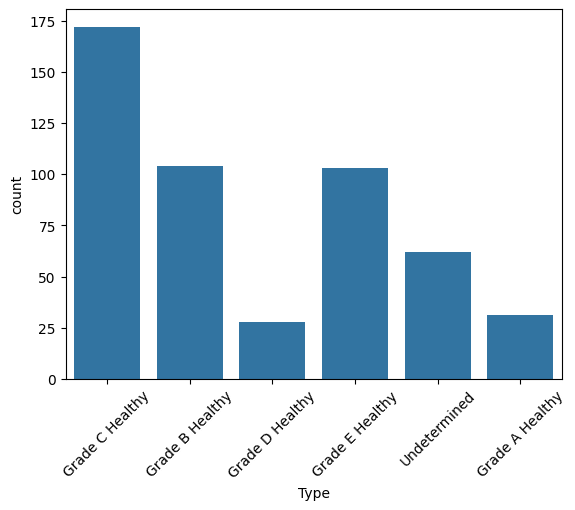

In [ ]:
#Count plot for grades of Category 1:
sns.countplot(x="Type",data=final_df1)
plt.xticks(rotation=45)
plt.show()

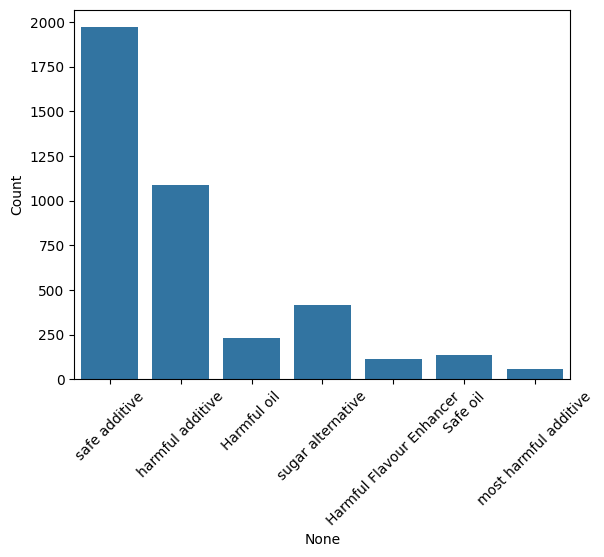

In [ ]:
#Barplot showing the count of the custom entities generated for category 2
sns.barplot(x=cat1_labels, y="Count", data=Cat1)
plt.xticks(rotation=45)
plt.show()

In [ ]:
labels_df=final_df1["Type"].value_counts().index
labels_df

Index(['Grade C Healthy', 'Grade B Healthy', 'Grade E Healthy', 'Undetermined',
       'Grade A Healthy', 'Grade D Healthy'],
      dtype='object', name='Type')

In [ ]:
cat1_labels=Cat1.index
cat1_labels

Index(['safe additive', 'harmful additive', 'Harmful oil', 'sugar alternative',
       'Harmful Flavour Enhancer', 'Safe oil', 'most harmful additive'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x7a3420e504c0>,
 [Text(0.04969852964968807, 1.6492513623310001, 'safe additive'),
  Text(-1.15917038328268, -1.1742333765143471, 'harmful additive'),
  Text(0.41571306522146023, -1.5967725722231636, 'Harmful oil'),
  Text(1.140653191944915, -1.192229128861511, 'sugar alternative'),
  Text(1.5258178037183139, -0.627996839049546, 'Harmful Flavour Enhancer'),
  Text(1.6185314037893652, -0.32071185657475665, 'Safe oil'),
  Text(1.6483011138626682, -0.07485611557573532, 'most harmful additive')],
 [Text(0.027108288899829854, 0.8995916521805453, '49.0%'),
  Text(-0.6322747545178254, -0.6404909326441892, '27.1%'),
  Text(0.22675258102988738, -0.8709668575762709, '5.8%'),
  Text(0.6221744683335899, -0.650306797560824, '10.4%'),
  Text(0.8322642565736257, -0.3425437303906614, '2.9%'),
  Text(0.8828353111578354, -0.17493373994986722, '3.3%'),
  Text(0.8990733348341825, -0.040830608495855625, '1.4%')])

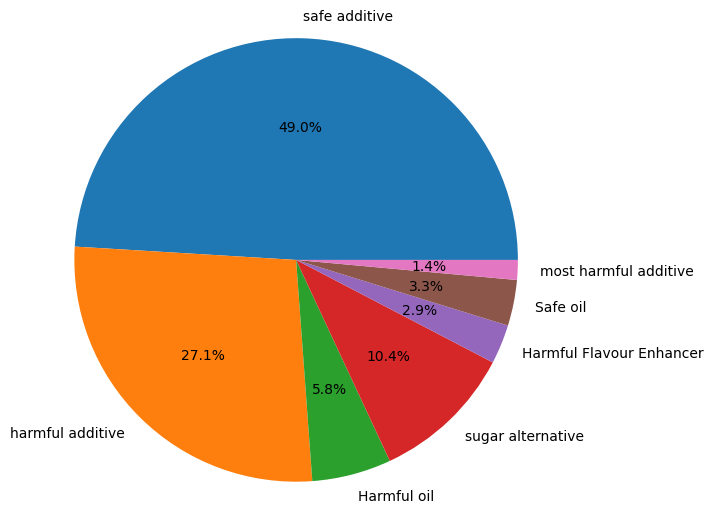

In [ ]:
#Pie Distribution for custom enetities generated for Category 1
plt.pie(Cat1["Count"],autopct='%0.1f%%', labels=cat1_labels, radius=1.5)

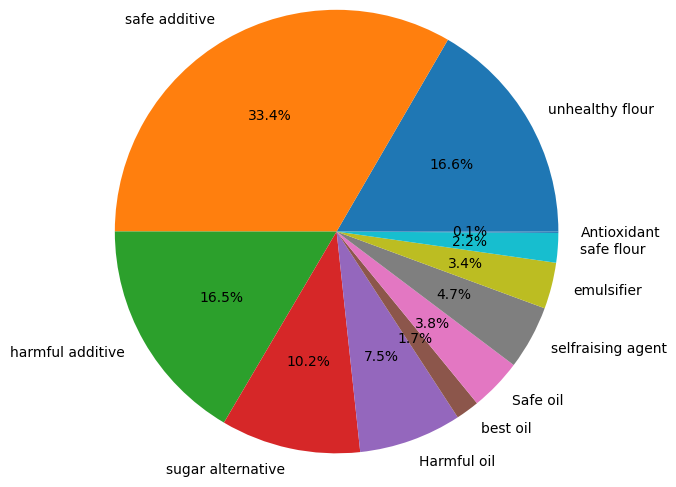

In [ ]:
cat2_labels=Cat2.index
cat2_labels
my_explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1]
plt.pie(Cat2["Count"],autopct='%0.1f%%', labels=cat2_labels, radius=1.5)
plt.show()

([<matplotlib.patches.Wedge at 0x7a3420eae9e0>,
 [Text(1.6437696126735823, 0.14325313417493388, 'Harmful oil'),
  Text(-0.40283808548336403, 1.600069210029397, 'safe additive'),
  Text(-1.3105546228295804, -1.0024702392490346, 'sugar alternative'),
  Text(0.40930406481138554, -1.5984274092147186, 'harmful additive'),
  Text(1.5852824299912616, -0.45758017566433223, 'Harmful Flavour Enhancer'),
  Text(1.6465485410859115, -0.106667248243577, 'most harmful additive'),
  Text(1.6494302036203732, -0.04335900581026115, 'Safe oil')],
 [Text(0.896601606912863, 0.07813807318632755, '2.8%'),
  Text(-0.2197298648091076, 0.8727650236523982, '52.3%'),
  Text(-0.714847976088862, -0.5468019486812914, '10.6%'),
  Text(0.2232567626243921, -0.8718694959353009, '26.6%'),
  Text(0.8646995072679607, -0.24958918672599936, '6.5%'),
  Text(0.8981173860468606, -0.05818213540558744, '0.4%'),
  Text(0.8996892019747489, -0.023650366805596984, '0.8%')])

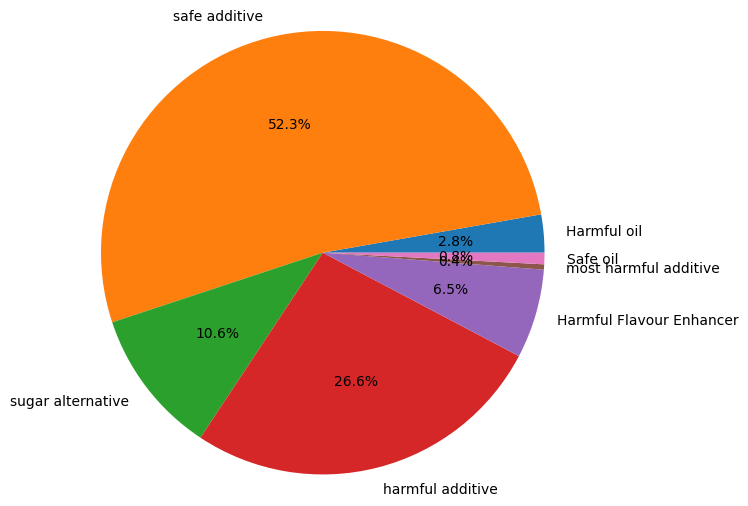

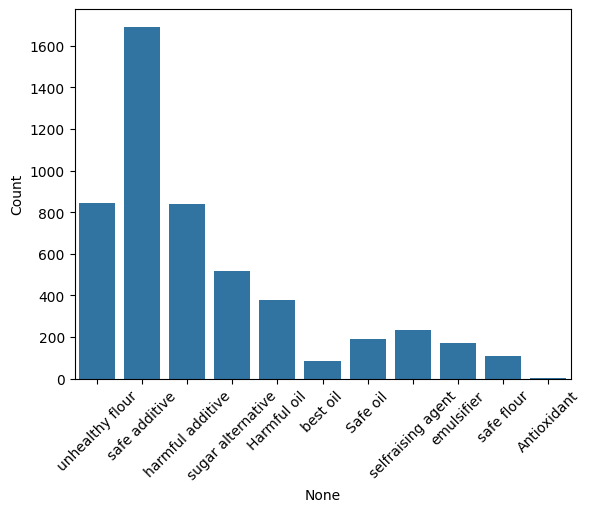

In [ ]:
sns.barplot(x=cat2_labels, y="Count", data=Cat2)
plt.xticks(rotation=45)
plt.show()

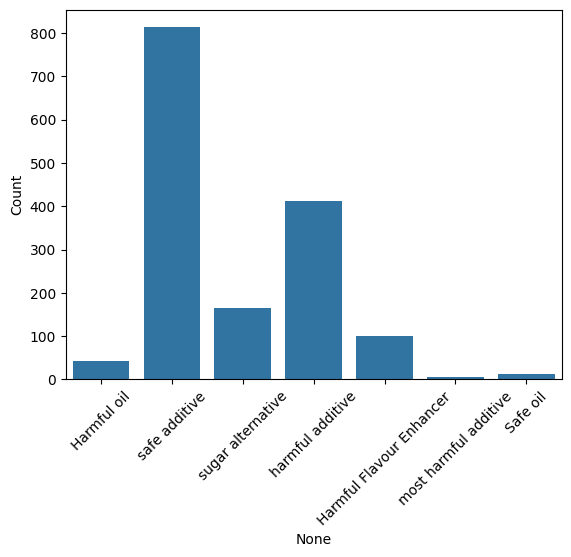

In [ ]:
sns.barplot(x=cat3_labels, y="Count", data=Cat3)
plt.xticks(rotation=45)
plt.show()

([<matplotlib.patches.Wedge at 0x7a34187958a0>,
 [Text(1.6437696126735823, 0.14325313417493388, 'Harmful oil'),
  Text(-0.40283808548336403, 1.600069210029397, 'safe additive'),
  Text(-1.3105546228295804, -1.0024702392490346, 'sugar alternative'),
  Text(0.40930406481138554, -1.5984274092147186, 'harmful additive'),
  Text(1.5852824299912616, -0.45758017566433223, 'Harmful Flavour Enhancer'),
  Text(1.6465485410859115, -0.106667248243577, 'most harmful additive'),
  Text(1.6494302036203732, -0.04335900581026115, 'Safe oil')],
 [Text(0.896601606912863, 0.07813807318632755, '2.8%'),
  Text(-0.2197298648091076, 0.8727650236523982, '52.3%'),
  Text(-0.714847976088862, -0.5468019486812914, '10.6%'),
  Text(0.2232567626243921, -0.8718694959353009, '26.6%'),
  Text(0.8646995072679607, -0.24958918672599936, '6.5%'),
  Text(0.8981173860468606, -0.05818213540558744, '0.4%'),
  Text(0.8996892019747489, -0.023650366805596984, '0.8%')])

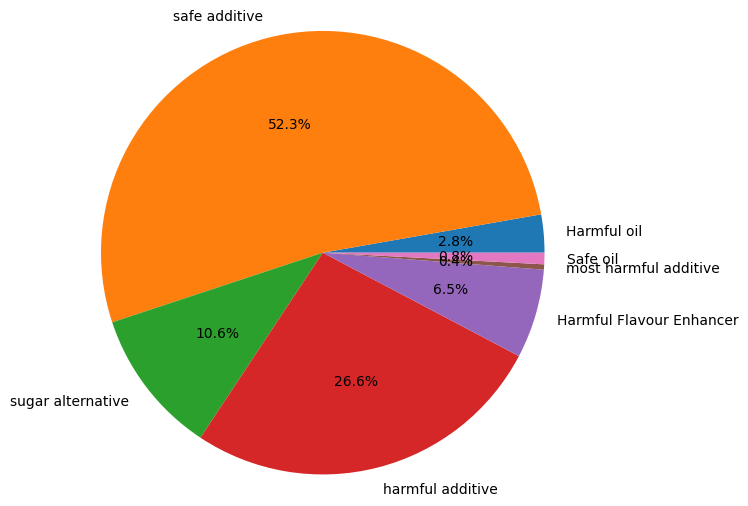

In [ ]:
cat3_labels=Cat3.index
cat3_labels
plt.pie(Cat3["Count"],autopct='%0.1f%%', labels=cat3_labels, radius=1.5)

In [ ]:
final_df1

,Ingredients,Type,Category_Biscuits and Crackers,Category_Chips&Crisps,"Category_Sauces,Salads,Chutneys"
0,"ingredients list, cashew nut, rapeseed oil, sa...",2,0,1,0
1,"ingredients ingredients, cashew nut, rapeseed ...",2,0,1,0
2,"ingredients ingredients, cashew nuts , sugar, ...",1,0,1,0
3,"ingredients, cashew nut, rapeseed oil, palm oi...",2,0,1,0
4,"ingredients cashew nuts , vegetable oil , rape...",2,0,1,0
...,...,...,...,...,...
495,"water, red chillies , sugar, glucose, fructose...",2,0,0,1
496,"avocado oil, pasteurised british free range eg...",4,0,0,1
497,"rapeseed oil , free range pasteurised egg yolk...",4,0,0,1
498,"rapeseed oil , avocado oil , free range pasteu...",4,0,0,1


## Holistic Ingredients Analysis

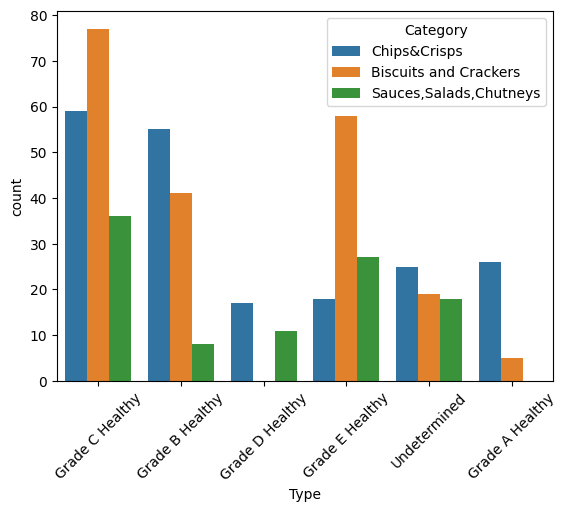

In [ ]:
#Count plot for grades of the whole food data (all three categories combined)

sns.countplot(x="Type", hue="Category", data=final_df1)
plt.xticks(rotation=45)
plt.show()

([<matplotlib.patches.Wedge at 0x7a341ae20c40>,
 [Text(0.5177742897621297, 0.9705203680816402, 'Grade C Healthy'),
  Text(-1.0418081661681415, 0.35303788026977245, 'Grade B Healthy'),
  Text(-0.6182916236423367, -0.9097886942217536, 'Grade E Healthy'),
  Text(0.468357315772955, -0.9953097129848341, 'Undetermined'),
  Text(0.9397052240149878, -0.5717989961157169, 'Grade A Healthy'),
  Text(1.083020784962167, -0.19252526935426476, 'Grade D Healthy')],
 [Text(0.2824223398702525, 0.5293747462263492, '34.4%'),
  Text(-0.5682589997280771, 0.19256611651078495, '20.8%'),
  Text(-0.3372499765321836, -0.49624837866641097, '20.6%'),
  Text(0.25546762678524815, -0.5428962070826366, '12.4%'),
  Text(0.5125664858263569, -0.31189036151766375, '6.2%'),
  Text(0.5907386099793637, -0.1050137832841444, '5.6%')])

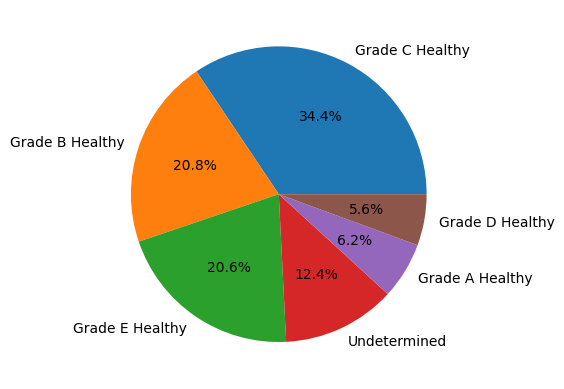

In [ ]:
# Pie Distribution showing the grades of all three categories combined
plt.pie(final_df1["Type"].value_counts(),autopct='%0.1f%%', labels=labels_df)

## Ingredient Analysis using PCA and TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
vectorizer=TfidfVectorizer(stop_words="english")

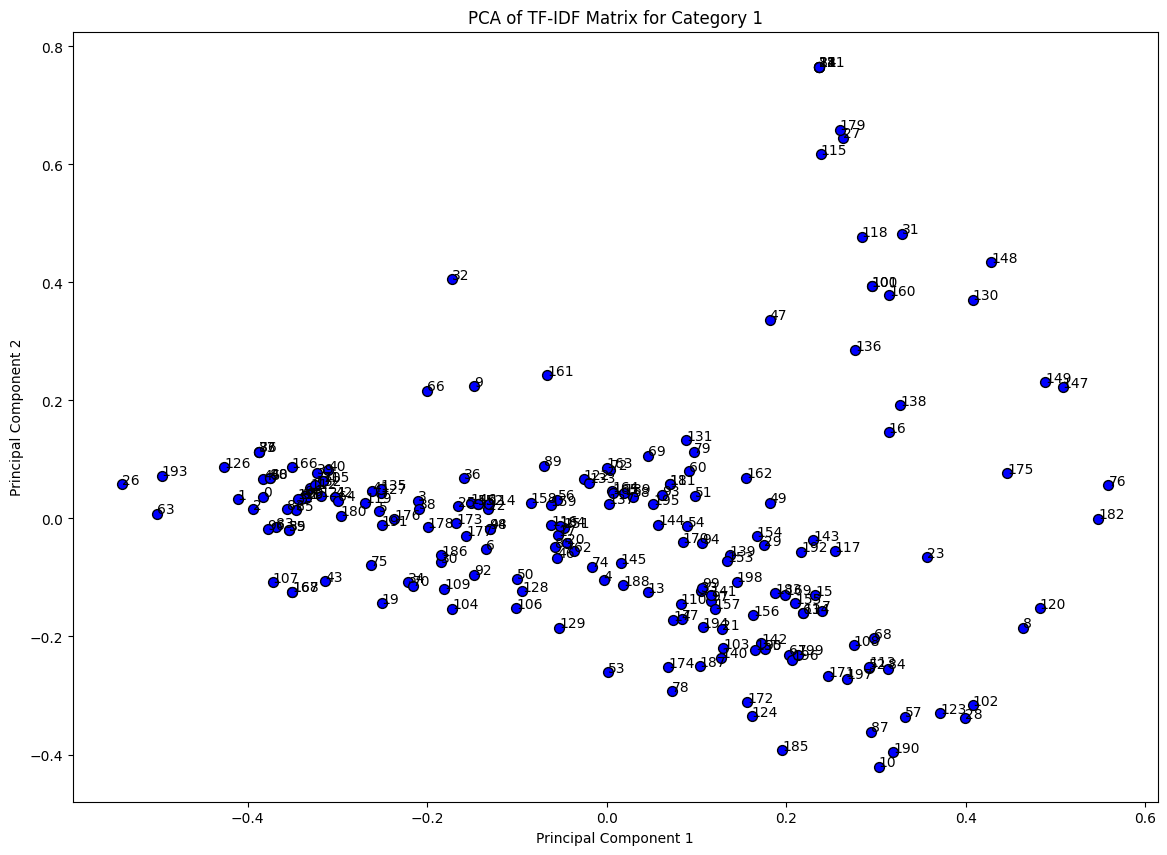

In [ ]:
#PCA Plot for category 1
tfidf_matrix_cat_1=vectorizer.fit_transform(extracted_train_1)
pca_cat1=PCA(n_components=0.9)
pca_result = pca_cat1.fit_transform(tfidf_matrix_cat_1.toarray())
plt.figure(figsize=(14, 10))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', edgecolor='k', s=50)
for i, txt in enumerate(extracted_train_1):
    plt.annotate(i, (pca_result[i, 0], pca_result[i, 1]))
plt.title('PCA of TF-IDF Matrix for Category 1')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

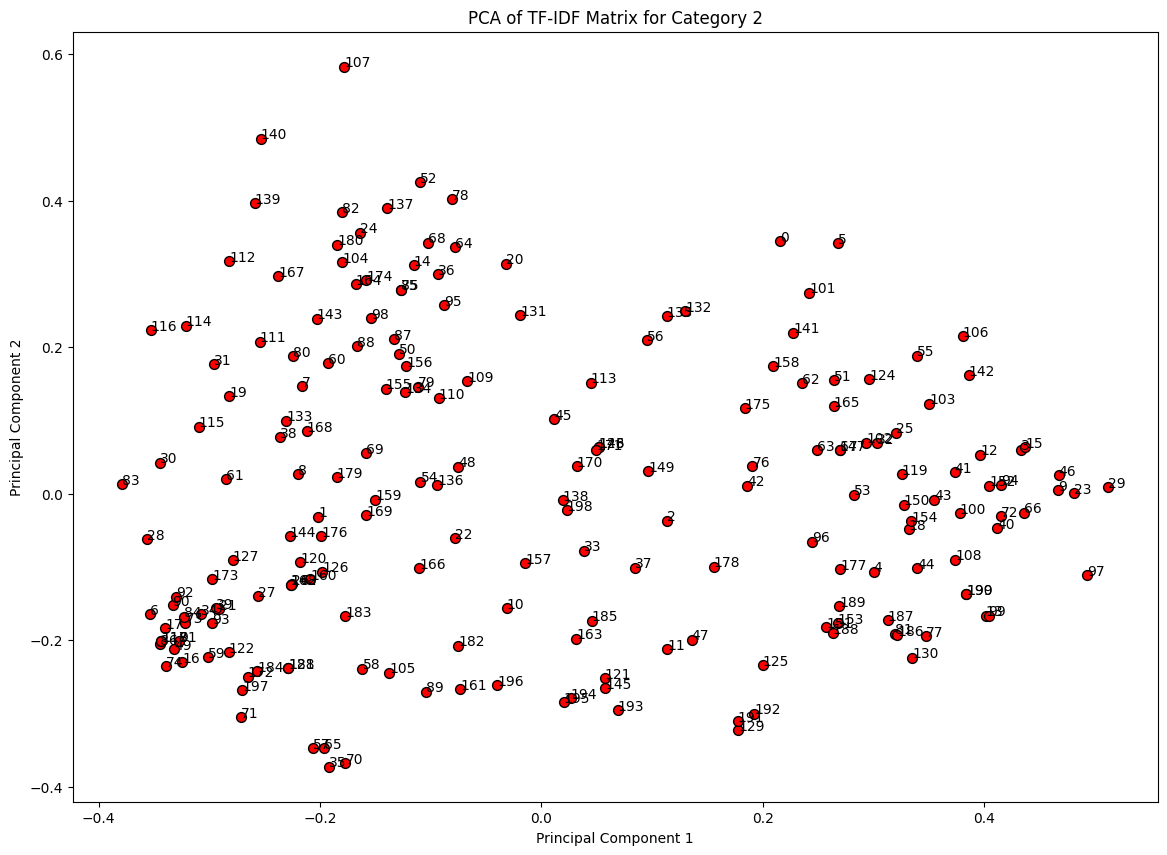

In [ ]:
#PCA Plot for category 2
tfidf_matrix_cat_2=vectorizer.fit_transform(extracted_train_2)
pca_cat2=PCA(n_components=0.9)
pca_result2 = pca_cat2.fit_transform(tfidf_matrix_cat_2.toarray())
plt.figure(figsize=(14, 10))
plt.scatter(pca_result2[:, 0], pca_result2[:, 1], c='red', edgecolor='k', s=50)
for i, txt in enumerate(extracted_train_2):
    plt.annotate(i, (pca_result2[i, 0], pca_result2[i, 1]))
plt.title('PCA of TF-IDF Matrix for Category 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

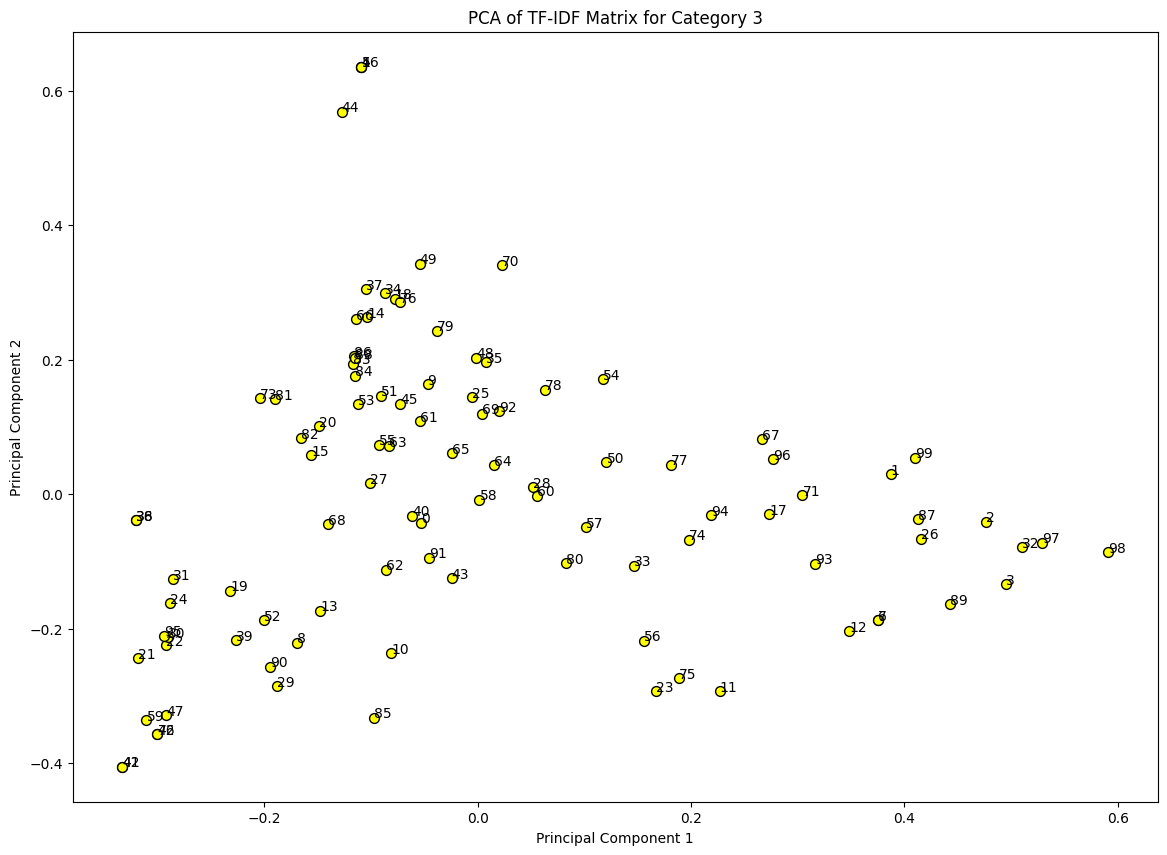

In [ ]:
#PCA Plot for category 3
tfidf_matrix_cat_3=vectorizer.fit_transform(extracted_train_3)
pca_cat3=PCA(n_components=0.9)
pca_result3 = pca_cat3.fit_transform(tfidf_matrix_cat_3.toarray())
plt.figure(figsize=(14, 10))
plt.scatter(pca_result3[:, 0], pca_result3[:, 1], c='yellow', edgecolor='k', s=50)
for i, txt in enumerate(extracted_train_3):
    plt.annotate(i, (pca_result3[i, 0], pca_result3[i, 1]))
plt.title('PCA of TF-IDF Matrix for Category 3')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# **Model Building**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

In [ ]:
# Converting Categorical Data to Numerical Data using Encoding
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
final_df1["Type"]=label_en.fit_transform(final_df1["Type"])

In [ ]:
#Chechking which label belongs to which category
label_en.inverse_transform([0,1,2,3,4,5])

array(['Grade A Healthy', 'Grade B Healthy', 'Grade C Healthy',
       'Grade D Healthy', 'Grade E Healthy', 'Undetermined'], dtype=object)

In [ ]:
final_df1=pd.get_dummies(final_df1, columns=["Category"], dtype=int)

In [ ]:
#Data Partitioning into Features and Target
#X: Features
#Y: Target
X=final_df1.drop("Type", axis=1)
Y=final_df1["Type"]

In [ ]:
#Data Splitting using Train-Test-Split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.25, random_state=21)

In [ ]:
X_train=X_train.reset_index(drop=True)
Y_train=Y_train.reset_index(drop=True)

## **1. K-Nearest Neighbours**

## **Finding the ideal number of neighbors for KNN**

In [ ]:
import numpy as np
no_of_neighbours=np.arange(2,30,1)

In [ ]:
model_1_hyp_pred=[]
for i in no_of_neighbours:
  model_1_hyp=Pipeline([
    ("tfidf_vect_1", TfidfVectorizer()),
    ("KNN", KNeighborsClassifier(n_neighbors=i))])

  model_1_hyp.fit(X_train['Ingredients'], Y_train)
  model_1_hyp_pred.append(model_1_hyp.score(X_test["Ingredients"], Y_test))


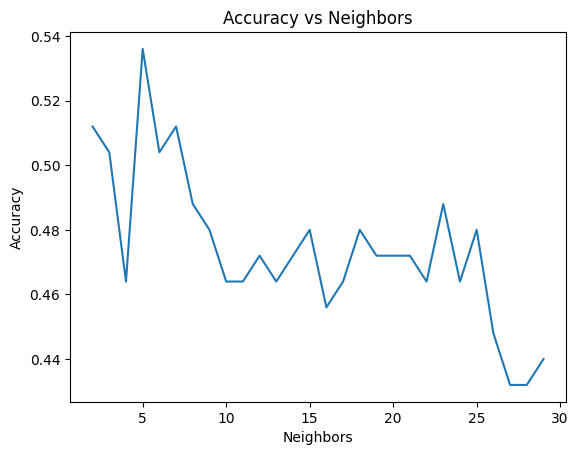

Highest accuracy is 0.536 for neighbours as 5


In [ ]:
sns.lineplot(y=model_1_hyp_pred, x=no_of_neighbours)
plt.title("Accuracy vs Neighbors")
plt.xlabel("Neighbors")
plt.ylabel("Accuracy")
plt.show()
print(f"Highest accuracy is {max(model_1_hyp_pred)} for neighbours as 5")

In [ ]:
model_1_hyp_pred

[0.512,
 0.504,
 0.464,
 0.536,
 0.504,
 0.512,
 0.488,
 0.48,
 0.464,
 0.464,
 0.472,
 0.464,
 0.472,
 0.48,
 0.456,
 0.464,
 0.48,
 0.472,
 0.472,
 0.472,
 0.464,
 0.488,
 0.464,
 0.48,
 0.448,
 0.432,
 0.432,
 0.44]

In [ ]:
model_1=Pipeline([
    ("tfidf_vect_1", TfidfVectorizer()),
    ("KNN", KNeighborsClassifier(n_neighbors=5))
])
model_1.fit(X_train['Ingredients'], Y_train)
model_1_pred=model_1.predict(X_test["Ingredients"])
print(classification_report(Y_test, model_1_pred))

              precision    recall  f1-score   support

           0       0.33      0.43      0.38         7
           1       0.33      0.48      0.39        21
           2       0.67      0.72      0.69        47
           3       0.43      0.60      0.50         5
           4       0.62      0.52      0.57        29
           5       0.50      0.12      0.20        16

    accuracy                           0.54       125
   macro avg       0.48      0.48      0.45       125
weighted avg       0.55      0.54      0.52       125



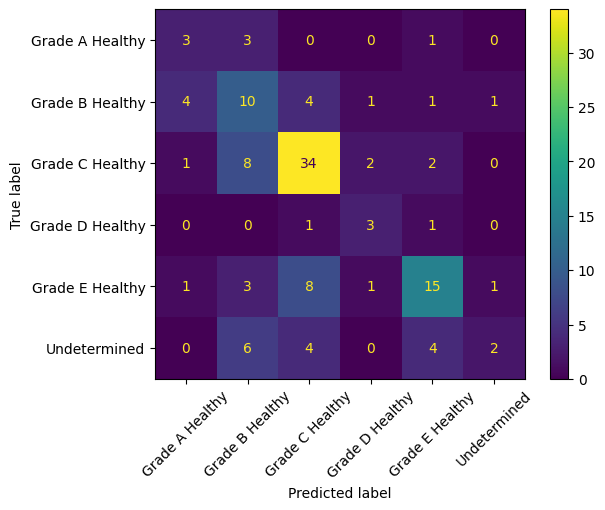

In [ ]:
#Confusion Matrix for KNN
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
knn_cm=confusion_matrix(Y_test, model_1_pred)
knn_cm_display=ConfusionMatrixDisplay(knn_cm, display_labels=label_en.inverse_transform([0,1,2,3,4,5]))
knn_cm_display.plot()
plt.xticks(rotation=45)
plt.show()


## **2. Multinomial Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model_2=Pipeline([
    ("tfidf_vect_1", TfidfVectorizer()),
    ("Multi_NB", MultinomialNB())
])

In [ ]:
model_2.fit(X_train["Ingredients"], Y_train)

Pipeline(steps=[('tfidf_vect_1', TfidfVectorizer()),
                ('Multi_NB', MultinomialNB())])

In [ ]:
model_2_pred=model_2.predict(X_test["Ingredients"])

In [ ]:
print(classification_report(Y_test, model_2_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.54      0.62      0.58        21
           2       0.48      0.94      0.63        47
           3       0.00      0.00      0.00         5
           4       0.75      0.21      0.32        29
           5       0.00      0.00      0.00        16

    accuracy                           0.50       125
   macro avg       0.29      0.29      0.26       125
weighted avg       0.44      0.50      0.41       125



## **Hyper parameter tuning - Multinomial Naive Bayes Classifier**

In [ ]:
param_mnb={'Multi_NB__alpha':[0.01,0.1,1,10]}

In [ ]:
mnb_hyp=GridSearchCV(model_2, param_mnb, cv=10)

In [ ]:
mnb_hyp.fit(X_train["Ingredients"], Y_train)
model_2_pred_hyp=mnb_hyp.predict(X_test["Ingredients"])
print(classification_report(Y_test, model_2_pred_hyp))

              precision    recall  f1-score   support

           0       0.33      0.14      0.20         7
           1       0.42      0.62      0.50        21
           2       0.60      0.77      0.67        47
           3       0.00      0.00      0.00         5
           4       0.70      0.55      0.62        29
           5       0.67      0.12      0.21        16

    accuracy                           0.54       125
   macro avg       0.45      0.37      0.37       125
weighted avg       0.56      0.54      0.52       125



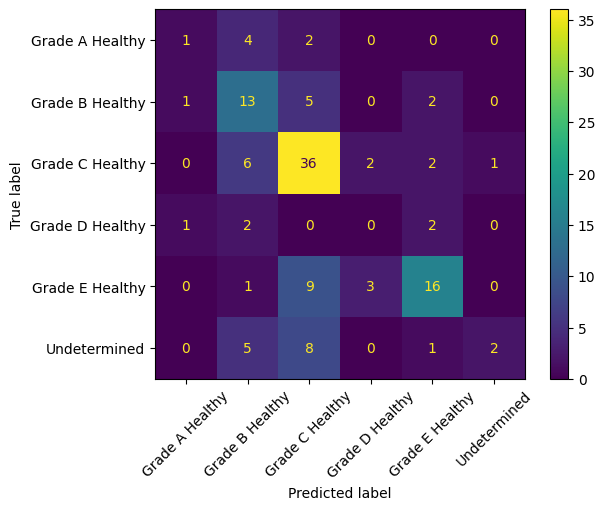

In [ ]:
#Confusion Matrix for Multinomial Naive Bayes
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
mnb_cm=confusion_matrix(Y_test, model_2_pred_hyp)
mnb_cm_display=ConfusionMatrixDisplay(mnb_cm, display_labels=label_en.inverse_transform([0,1,2,3,4,5]))
mnb_cm_display.plot()
plt.xticks(rotation=45)
plt.show()


## **3. Support Vector Classifier**

In [ ]:
from sklearn.svm import SVC
model_4=Pipeline([
    ("tfidf_vect_1", TfidfVectorizer()),
    ("Support_Vector_Classifier", SVC())
])

In [ ]:
model_4.fit(X_train["Ingredients"], Y_train)

Pipeline(steps=[('tfidf_vect_1', TfidfVectorizer()),
                ('Support_Vector_Classifier', SVC())])

In [ ]:
model_4_pred=model_4.predict(X_test["Ingredients"])

In [ ]:
print(classification_report(Y_test, model_4_pred))

              precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.46      0.57      0.51        21
           2       0.61      0.85      0.71        47
           3       0.00      0.00      0.00         5
           4       0.67      0.48      0.56        29
           5       0.50      0.25      0.33        16

    accuracy                           0.58       125
   macro avg       0.48      0.41      0.42       125
weighted avg       0.56      0.58      0.55       125



## **Hyper parameter tuning - SVM Classifier**

In [ ]:
param_svm={'Support_Vector_Classifier__C':[0.1,1,10],
           'Support_Vector_Classifier__gamma':[1,0.1,0.01],
           'Support_Vector_Classifier__kernel':['rbf']}
svm_hyp=GridSearchCV(model_4, param_svm, cv=10)
svm_hyp.fit(X_train["Ingredients"], Y_train)
model_4_pred_hyp=svm_hyp.predict(X_test["Ingredients"])
print(classification_report(Y_test, model_4_pred_hyp))

              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.44      0.57      0.50        21
           2       0.66      0.70      0.68        47
           3       0.17      0.20      0.18         5
           4       0.65      0.59      0.62        29
           5       0.55      0.38      0.44        16

    accuracy                           0.58       125
   macro avg       0.51      0.48      0.49       125
weighted avg       0.58      0.58      0.58       125



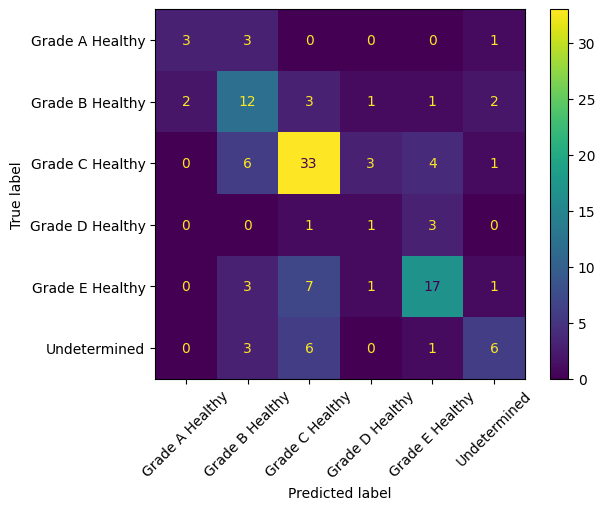

In [ ]:
#Confusion Matrix for Support Vector Classifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
svm_cm=confusion_matrix(Y_test, model_4_pred_hyp)
svm_cm_display=ConfusionMatrixDisplay(svm_cm, display_labels=label_en.inverse_transform([0,1,2,3,4,5]))
svm_cm_display.plot()
plt.xticks(rotation=45)
plt.show()


## **4. Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_3=Pipeline([
    ("tfidf_vect_1", TfidfVectorizer()),
    ("Random_Forest", RandomForestClassifier())
])

In [ ]:
model_3.fit(X_train["Ingredients"], Y_train)

Pipeline(steps=[('tfidf_vect_1', TfidfVectorizer()),
                ('Random_Forest', RandomForestClassifier())])

In [ ]:
model_3_pred=model_3.predict(X_test["Ingredients"])

In [ ]:
print(classification_report(Y_test, model_3_pred))

              precision    recall  f1-score   support

           0       0.45      0.71      0.56         7
           1       0.65      0.62      0.63        21
           2       0.69      0.85      0.76        47
           3       0.00      0.00      0.00         5
           4       0.74      0.59      0.65        29
           5       0.73      0.50      0.59        16

    accuracy                           0.66       125
   macro avg       0.54      0.55      0.53       125
weighted avg       0.66      0.66      0.65       125



## **Hyper parameter tuning - Random Forest Classifier**

In [ ]:
param_rf={
    'Random_Forest__n_estimators':[25,75,150,250],
    'Random_Forest__max_features':['sqrt','log2',None],
    'Random_Forest__max_depth':[3,7,9]
}

In [ ]:
rf_hyp=GridSearchCV(model_3, param_rf, cv=10)

In [ ]:
rf_hyp.fit(X_train["Ingredients"], Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf_vect_1', TfidfVectorizer()),
                                       ('Random_Forest',
                                        RandomForestClassifier())]),
             param_grid={'Random_Forest__max_depth': [3, 7, 9],
                         'Random_Forest__max_features': ['sqrt', 'log2', None],
                         'Random_Forest__n_estimators': [25, 75, 150, 250]})

In [ ]:
model_3_hyp_pred=rf_hyp.predict(X_test["Ingredients"])
print(classification_report(Y_test, model_3_hyp_pred))

              precision    recall  f1-score   support

           0       0.56      0.71      0.63         7
           1       0.55      0.57      0.56        21
           2       0.64      0.81      0.72        47
           3       0.00      0.00      0.00         5
           4       0.60      0.41      0.49        29
           5       0.50      0.38      0.43        16

    accuracy                           0.58       125
   macro avg       0.47      0.48      0.47       125
weighted avg       0.57      0.58      0.57       125



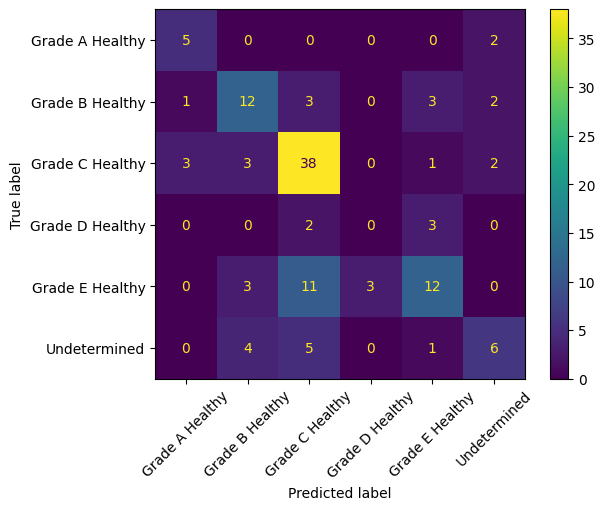

In [ ]:
#Confusion Matrix for Random Forest Classifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
rf_cm=confusion_matrix(Y_test, model_3_hyp_pred)
rf_cm_display=ConfusionMatrixDisplay(rf_cm, display_labels=label_en.inverse_transform([0,1,2,3,4,5]))
rf_cm_display.plot()
plt.xticks(rotation=45)
plt.show()


## **5. XGBoost Classifier**

In [ ]:
import xgboost as xgb
model_5=Pipeline([
    ("tfidf_vect_1", TfidfVectorizer()),
    ("Xgb_Cl", xgb.XGBClassifier())
])

In [ ]:
model_5.fit(X_train["Ingredients"], Y_train)

Pipeline(steps=[('tfidf_vect_1', TfidfVectorizer()),
                ('Xgb_Cl',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [ ]:
model_5_pred=model_5.predict(X_test["Ingredients"])

In [ ]:
print(classification_report(Y_test, model_5_pred))

              precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.48      0.67      0.56        21
           2       0.72      0.66      0.69        47
           3       0.43      0.60      0.50         5
           4       0.65      0.52      0.58        29
           5       0.73      0.69      0.71        16

    accuracy                           0.63       125
   macro avg       0.61      0.64      0.62       125
weighted avg       0.65      0.63      0.64       125



## **Hyper parameter tuning - Extreme Gradient Boosting Classfier**

In [ ]:
param_xgb={
    'Xgb_Cl__n_estimators':[25,50,70,95],
    'Xgb_Cl__max_depth':[4,5,6],
    'Xgb_Cl__learning_rate':[0.1,0.05, 0.01]

}

In [ ]:
xgb_hyp=GridSearchCV(model_5, param_xgb, cv=10)
xgb_hyp.fit(X_train["Ingredients"], Y_train)
model_5_pred_hyp=xgb_hyp.predict(X_test["Ingredients"])
print(classification_report(Y_test, model_5_pred_hyp))

              precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.55      0.57      0.56        21
           2       0.73      0.77      0.75        47
           3       0.43      0.60      0.50         5
           4       0.62      0.55      0.58        29
           5       0.77      0.62      0.69        16

    accuracy                           0.66       125
   macro avg       0.62      0.64      0.62       125
weighted avg       0.66      0.66      0.66       125



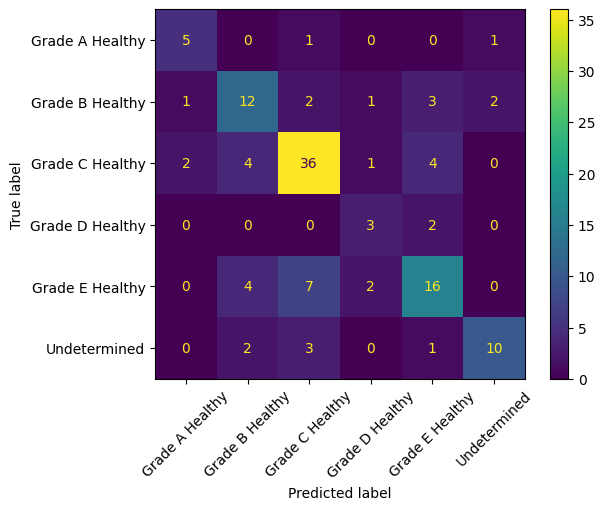

In [ ]:
#Confusion Matrix for XGBoost Classifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
xgb_cm=confusion_matrix(Y_test, model_5_pred_hyp)
xgb_cm_display=ConfusionMatrixDisplay(xgb_cm, display_labels=label_en.inverse_transform([0,1,2,3,4,5]))
xgb_cm_display.plot()
plt.xticks(rotation=45)
plt.show()


Thank you! The End!
